In [146]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from scipy.stats import iqr

# Import Data

In [147]:
raw_data = pd.read_excel('CSB_Vorhersage_AKF_Version_3.1._Verweildauer(DQ3378)_cleaned.xlsx')

In [148]:
raw_data.head()

,DateTime,Gesamt_Zulaufmenge_zu_AKF_(m3;h),Durchschnittlicher_CSB_(mg;l),Gesamt_Fracht_vor_AKF_CSB_(kg;h),Volumen_einzelner_AKF_(m3),Verweildauer_Tank_1_(h),Verweildauer_Tank_2_(h),Verweildauer_Tank_3_(h),Verweildauer_Tank_4_(h),Verweildauer_Tank_5_(h),Alter_AKF_Tank_1_aktuelle_Fracht,Alter_AKF_Tank_2_aktuelle_Fracht,Alter_AKF_Tank_3_aktuelle_Fracht,Alter_AKF_Tank_4_aktuelle_Fracht,Alter_AKF_Tank_5_aktuelle_Fracht,Alter_AKF_Tank_1_gesamt_Fracht,Alter_AKF_Tank_2_gesamt_Fracht,Alter_AKF_Tank_3_gesamt_Fracht,Alter_AKF_Tank_4_gesamt_Fracht,Alter_AKF_Tank_5_gesamt_Fracht,AKF_Tank_10_CSB,AKF_Tank_20_CSB,AKF_Tank_30_CSB,AKF_Tank_40_CSB,AKF_Tank_50_CSB,AKF_Tank_10_CSB_aktuelle_Fracht,AKF_Tank_20_CSB_aktuelle_Fracht,AKF_Tank_30_CSB_aktuelle_Fracht,AKF_Tank_40_CSB_aktuelle_Fracht,AKF_Tank_50_CSB_aktuelle_Fracht,AKF_Tank_10_CSB_Fracht,AKF_Tank_20_CSB_Fracht,AKF_Tank_30_CSB_Fracht,AKF_Tank_40_CSB_Fracht,AKF_Tank_50_CSB_Fracht,pH_Wert_in_UF_Vorlage_(pH),Temperatur_in_UF_Vorlage_(°C),Leitfähigkeit im Ablauf (mS/cm),Zulaufspeicher_2_CSB_[mg/l],Zulaufmenge_Zulaufspeicher_2_(m3;h),Fracht_Zulaufspeicher_2_(kg;h),Ablaufmenge_(m3;h),Grenzwert_(mg;l),Grenzwert_(kg;m3),Grenzfracht_(kg;h),Verbleibende_Ablauffracht_für_AKF_(kg;h),Baypass_(m3;h),Hauptablauf_(m3;h),Ablaufspeicher_CSB_[mg/l]
0,08.04.2019 00,18.514,341.717619,6.326560,20,1.080264,2.287431,2.287431,2.287431,1.080264,20.0,30.0,40.0,100.0,10.0,90,80,70,10,100,310.0,271.0,214.0,42.0,323.0,5.980022,5.73934,5.017294,3.961996,6.326560,13902.372419,9355.145419,4299.218633,3.961996,NaN,7.3,27.5,4.3,58.708333,5.162,0.303052,23.676,122.25,0.12225,2.894391,2.591339,9.770567,8.743433,122.25
1,08.04.2019 01,18.531,342.561961,6.348016,20,1.079273,2.070492,2.070492,2.070492,1.079273,20.0,30.0,40.0,100.0,10.0,90,80,70,10,100,310.0,271.0,214.0,42.0,323.0,5.985513,5.74461,5.021901,3.965634,6.348016,13908.357932,9360.890029,4304.240534,7.927630,NaN,7.3,27.5,4.3,58.416667,5.161,0.301488,23.692,122.50,0.12250,2.902270,2.600782,8.871460,9.659540,122.50
2,08.04.2019 02,18.588,343.341677,6.382035,20,1.075963,2.067729,2.067729,2.067729,1.075963,20.0,30.0,40.0,100.0,10.0,90,80,70,10,100,310.0,271.0,214.0,42.0,323.0,6.003924,5.76228,5.037348,3.977832,6.382035,13914.361856,9366.652309,4309.277882,11.905462,NaN,7.3,27.5,4.3,58.125000,5.165,0.300216,23.753,122.75,0.12275,2.915681,2.615465,8.915554,9.672446,122.75
3,08.04.2019 03,18.468,344.502416,6.362271,20,1.082954,2.077440,2.077440,2.077440,1.082954,20.0,30.0,40.0,100.0,10.0,90,80,70,10,100,310.0,271.0,214.0,42.0,323.0,5.965164,5.72508,5.004828,3.952152,6.362271,13920.327020,9372.377389,4314.282710,15.857614,NaN,7.3,27.5,4.3,57.833333,5.175,0.299287,23.643,123.00,0.12300,2.908089,2.608802,8.840768,9.627232,123.00
4,08.04.2019 04,18.416,345.492841,6.362596,20,1.086012,2.082407,2.082407,2.082407,1.086012,20.0,30.0,40.0,100.0,10.0,90,80,70,10,100,310.0,271.0,214.0,42.0,323.0,5.948368,5.70896,4.990736,3.941024,6.362596,13926.275388,9378.086349,4319.273446,19.798638,NaN,7.3,27.5,4.3,57.541667,5.189,0.298584,23.605,123.25,0.12325,2.909316,2.610733,8.811728,9.604272,123.25


In [149]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   DateTime                                  14016 non-null  object 
 1   Gesamt_Zulaufmenge_zu_AKF_(m3;h)          14016 non-null  float64
 2   Durchschnittlicher_CSB_(mg;l)             14016 non-null  float64
 3   Gesamt_Fracht_vor_AKF_CSB_(kg;h)          14016 non-null  float64
 4   Volumen_einzelner_AKF_(m3)                14016 non-null  int64  
 5   Verweildauer_Tank_1_(h)                   14016 non-null  float64
 6   Verweildauer_Tank_2_(h)                   14016 non-null  float64
 7   Verweildauer_Tank_3_(h)                   14016 non-null  float64
 8   Verweildauer_Tank_4_(h)                   14016 non-null  float64
 9   Verweildauer_Tank_5_(h)                   14016 non-null  float64
 10  Alter_AKF_Tank_1_aktuelle_Fracht  

# Creating Data Frame For Each Tank

In [150]:
data_tank_1 = raw_data[['DateTime', 'Gesamt_Zulaufmenge_zu_AKF_(m3;h)', 'Durchschnittlicher_CSB_(mg;l)', 'Volumen_einzelner_AKF_(m3)', 'Verweildauer_Tank_1_(h)',  'AKF_Tank_10_CSB_aktuelle_Fracht', 'AKF_Tank_10_CSB_Fracht', 'pH_Wert_in_UF_Vorlage_(pH)', 'Temperatur_in_UF_Vorlage_(°C)', 'AKF_Tank_10_CSB',]]

In [151]:
data_tank_2 = raw_data[['DateTime', 'Gesamt_Zulaufmenge_zu_AKF_(m3;h)', 'AKF_Tank_10_CSB', 'Volumen_einzelner_AKF_(m3)', 'Verweildauer_Tank_2_(h)',  'AKF_Tank_20_CSB_aktuelle_Fracht', 'AKF_Tank_20_CSB_Fracht', 'pH_Wert_in_UF_Vorlage_(pH)', 'Temperatur_in_UF_Vorlage_(°C)', 'AKF_Tank_20_CSB',]]

In [152]:
data_tank_3 = raw_data[['DateTime', 'Gesamt_Zulaufmenge_zu_AKF_(m3;h)', 'AKF_Tank_20_CSB', 'Volumen_einzelner_AKF_(m3)', 'Verweildauer_Tank_3_(h)',  'AKF_Tank_30_CSB_aktuelle_Fracht', 'AKF_Tank_30_CSB_Fracht', 'pH_Wert_in_UF_Vorlage_(pH)', 'Temperatur_in_UF_Vorlage_(°C)', 'AKF_Tank_30_CSB',]]

In [153]:
data_tank_4 = raw_data[['DateTime', 'Gesamt_Zulaufmenge_zu_AKF_(m3;h)', 'AKF_Tank_30_CSB', 'Volumen_einzelner_AKF_(m3)', 'Verweildauer_Tank_4_(h)',  'AKF_Tank_40_CSB_aktuelle_Fracht', 'AKF_Tank_40_CSB_Fracht', 'pH_Wert_in_UF_Vorlage_(pH)', 'Temperatur_in_UF_Vorlage_(°C)', 'AKF_Tank_40_CSB',]]

In [154]:
data_tank_5 = raw_data[['DateTime', 'Gesamt_Zulaufmenge_zu_AKF_(m3;h)', 'AKF_Tank_40_CSB', 'Volumen_einzelner_AKF_(m3)', 'Verweildauer_Tank_5_(h)',  'AKF_Tank_50_CSB_aktuelle_Fracht', 'AKF_Tank_50_CSB_Fracht', 'pH_Wert_in_UF_Vorlage_(pH)', 'Temperatur_in_UF_Vorlage_(°C)', 'AKF_Tank_50_CSB',]]

# Drop Rows with Null Values

In [155]:
data_tank_1.dropna(inplace = True)
data_tank_2.dropna(inplace = True)
data_tank_3.dropna(inplace = True)
data_tank_4.dropna(inplace = True)
data_tank_5.dropna(inplace = True)

In [156]:
print(data_tank_1.shape)
print(data_tank_2.shape)
print(data_tank_3.shape)
print(data_tank_4.shape)
print(data_tank_5.shape)

(13252, 10)
(12316, 10)
(11835, 10)
(11307, 10)
(10611, 10)


# Uniform Column Names 

In [157]:
column_names = ['DateTime', 'Gesamt_Zulaufmenge_zu_AKF_(m3;h)',
       'Durchschnittlicher_CSB-Zulauf_(mg;l)', 'Volumen_einzelner_AKF_(m3)',
       'Verweildauer_Tank_(h)', 'AKF_Tank_CSB_aktuelle_Fracht',
       'AKF_Tank_CSB_Fracht', 'pH_Wert_in_UF_Vorlage_(pH)',
       'Temperatur_in_UF_Vorlage_(°C)', 'AKF_Tank_CSB']

In [158]:
len(column_names)

10

In [159]:
data_tank_1.columns = column_names
data_tank_2.columns = column_names
data_tank_3.columns = column_names
data_tank_4.columns = column_names
data_tank_5.columns = column_names

# Concating Data Frames

In [160]:
data = pd.concat([data_tank_1, data_tank_2, data_tank_3, data_tank_4, data_tank_5], axis = 0, ignore_index = True)

In [161]:
data.shape

(59321, 10)

# Converting DateTime

In [162]:
data['DateTime'] = data['DateTime'].apply(lambda x: pd.Timestamp(x))
data.head()

,DateTime,Gesamt_Zulaufmenge_zu_AKF_(m3;h),Durchschnittlicher_CSB-Zulauf_(mg;l),Volumen_einzelner_AKF_(m3),Verweildauer_Tank_(h),AKF_Tank_CSB_aktuelle_Fracht,AKF_Tank_CSB_Fracht,pH_Wert_in_UF_Vorlage_(pH),Temperatur_in_UF_Vorlage_(°C),AKF_Tank_CSB
0,2019-08-04 00:00:00,18.514,341.717619,20,1.080264,5.980022,13902.372419,7.3,27.5,310.0
1,2019-08-04 01:00:00,18.531,342.561961,20,1.079273,5.985513,13908.357932,7.3,27.5,310.0
2,2019-08-04 02:00:00,18.588,343.341677,20,1.075963,6.003924,13914.361856,7.3,27.5,310.0
3,2019-08-04 03:00:00,18.468,344.502416,20,1.082954,5.965164,13920.327020,7.3,27.5,310.0
4,2019-08-04 04:00:00,18.416,345.492841,20,1.086012,5.948368,13926.275388,7.3,27.5,310.0


# Sort Data by Date

In [163]:
data = data.sort_values(['DateTime', 'AKF_Tank_CSB_Fracht'], axis=0, ascending=[True, False], kind='quicksort')
data.reset_index(drop=True, inplace=True)
data.head(15)


,DateTime,Gesamt_Zulaufmenge_zu_AKF_(m3;h),Durchschnittlicher_CSB-Zulauf_(mg;l),Volumen_einzelner_AKF_(m3),Verweildauer_Tank_(h),AKF_Tank_CSB_aktuelle_Fracht,AKF_Tank_CSB_Fracht,pH_Wert_in_UF_Vorlage_(pH),Temperatur_in_UF_Vorlage_(°C),AKF_Tank_CSB
0,2019-01-05 00:00:00,17.290,442.670677,20,1.156738,7.653776,17409.263914,7.3,30.200,434.0
1,2019-01-05 00:00:00,17.290,434.000000,20,1.156738,7.503860,12750.853532,7.3,30.200,411.0
2,2019-01-05 00:00:00,17.290,411.000000,20,2.458585,7.106190,7300.736331,7.3,30.200,365.0
3,2019-01-05 00:00:00,17.290,365.000000,20,2.458585,6.310850,2453.274143,7.3,30.200,235.0
4,2019-01-05 00:00:00,17.290,235.000000,20,2.458585,4.063150,199.318775,7.3,30.200,60.0
5,2019-01-05 01:00:00,17.210,443.291807,20,1.162115,7.629052,17416.892966,7.3,30.124,434.0
6,2019-01-05 01:00:00,17.210,434.000000,20,1.162115,7.469140,12758.322672,7.3,30.124,411.0
7,2019-01-05 01:00:00,17.210,411.000000,20,2.470525,7.073310,7307.809641,7.3,30.124,365.0
8,2019-01-05 01:00:00,17.210,365.000000,20,2.470525,6.281650,2459.555793,7.3,30.124,235.0
9,2019-01-05 01:00:00,17.210,235.000000,20,2.470525,4.044350,203.363125,7.3,30.124,60.0


# Split continuous and discrete

In [164]:
#Function for converting numericals into discrete & continuous
def converter(data,value=200):
    Categoricals=data.select_dtypes(["object",'datetime'])
    numbers=data.select_dtypes(np.number)
    numbernames=numbers.columns
    continuous=[]
    discrete= []
    for i in numbernames:
        if len(data[i].unique()) > value:
            continuous.append(i)
        else:
            discrete.append(i)
    DiscreteValues=data[discrete]
    ContinuousValues=data[continuous]
    return Categoricals,DiscreteValues,ContinuousValues

#Categoricals,DiscreteValues,ContinuousValues=converter(data)

In [165]:
categoricals,discrete,continuous = converter(data)

In [166]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59321 entries, 0 to 59320
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  59321 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 463.6 KB


In [167]:
discrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59321 entries, 0 to 59320
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Volumen_einzelner_AKF_(m3)  59321 non-null  int64
dtypes: int64(1)
memory usage: 463.6 KB


In [168]:
continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59321 entries, 0 to 59320
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gesamt_Zulaufmenge_zu_AKF_(m3;h)      59321 non-null  float64
 1   Durchschnittlicher_CSB-Zulauf_(mg;l)  59321 non-null  float64
 2   Verweildauer_Tank_(h)                 59321 non-null  float64
 3   AKF_Tank_CSB_aktuelle_Fracht          59321 non-null  float64
 4   AKF_Tank_CSB_Fracht                   59321 non-null  float64
 5   pH_Wert_in_UF_Vorlage_(pH)            59321 non-null  float64
 6   Temperatur_in_UF_Vorlage_(°C)         59321 non-null  float64
 7   AKF_Tank_CSB                          59321 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


# Looking for negative values

In [169]:
for column in continuous.columns:
    print(column, ': ',continuous[column][continuous[column] < 0], '\n')

Gesamt_Zulaufmenge_zu_AKF_(m3;h) :  Series([], Name: Gesamt_Zulaufmenge_zu_AKF_(m3;h), dtype: float64) 

Durchschnittlicher_CSB-Zulauf_(mg;l) :  Series([], Name: Durchschnittlicher_CSB-Zulauf_(mg;l), dtype: float64) 

Verweildauer_Tank_(h) :  14834   -8.150335
14835   -8.150335
14836   -8.150335
Name: Verweildauer_Tank_(h), dtype: float64 

AKF_Tank_CSB_aktuelle_Fracht :  Series([], Name: AKF_Tank_CSB_aktuelle_Fracht, dtype: float64) 

AKF_Tank_CSB_Fracht :  Series([], Name: AKF_Tank_CSB_Fracht, dtype: float64) 

pH_Wert_in_UF_Vorlage_(pH) :  Series([], Name: pH_Wert_in_UF_Vorlage_(pH), dtype: float64) 

Temperatur_in_UF_Vorlage_(°C) :  Series([], Name: Temperatur_in_UF_Vorlage_(°C), dtype: float64) 

AKF_Tank_CSB :  Series([], Name: AKF_Tank_CSB, dtype: float64) 



In [170]:
to_drop = list(continuous['Verweildauer_Tank_(h)'][continuous['Verweildauer_Tank_(h)'] < 0].index)

In [171]:
to_drop

[14834, 14835, 14836]

In [172]:
continuous.drop(index = to_drop, inplace = True)

In [173]:
categoricals.drop(index = to_drop, inplace = True)
discrete.drop(index = to_drop, inplace = True)

# Data Exloration

In [174]:
def distplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        print(col)
        sns.distplot(df[col])
        plt.show()

In [175]:
#distplot_df(continuous)

In [176]:
#boxplot for continuous
def boxplot_num(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.boxplot(y=col, data=df)
        plt.show()

In [177]:
#boxplot_num(continuous)

In [178]:
# Handling outlier in Verweildauer, Temperatur and PH-value

In [179]:
continuous.shape

(59318, 8)

In [180]:
def iqr_drop(data, column):
    
    # upper and lower limit (1.5 * iqr) 
    u_limit = data[column].mean()+ 1.5*iqr(data[column])
    l_limit = data[column].mean()- 1.5*iqr(data[column])
    
    # drop outliers
    to_drop = []
    to_drop = to_drop + list(data[data[column] > u_limit].index)
    to_drop = to_drop + list(data[data[column] < l_limit].index)
    
    data.drop(index = to_drop, inplace = True)
    
    # boxplot
    sns.boxplot(data[column])
    plt.show()
    return data

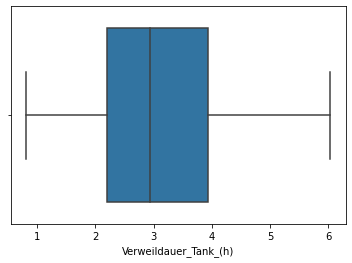

,Gesamt_Zulaufmenge_zu_AKF_(m3;h),Durchschnittlicher_CSB-Zulauf_(mg;l),Verweildauer_Tank_(h),AKF_Tank_CSB_aktuelle_Fracht,AKF_Tank_CSB_Fracht,pH_Wert_in_UF_Vorlage_(pH),Temperatur_in_UF_Vorlage_(°C),AKF_Tank_CSB
0,17.290,442.670677,1.156738,7.653776,17409.263914,7.3,30.200,434.0
1,17.290,434.000000,1.156738,7.503860,12750.853532,7.3,30.200,411.0
2,17.290,411.000000,2.458585,7.106190,7300.736331,7.3,30.200,365.0
3,17.290,365.000000,2.458585,6.310850,2453.274143,7.3,30.200,235.0
4,17.290,235.000000,2.458585,4.063150,199.318775,7.3,30.200,60.0
...,...,...,...,...,...,...,...,...
59316,10.598,486.821193,1.887149,5.159331,12851.106520,7.6,35.642,449.0
59317,10.598,449.000000,1.887149,4.758502,8899.281461,7.6,35.642,415.0
59318,10.598,415.000000,4.100360,4.398170,5968.722526,7.6,35.642,379.0
59319,10.598,379.000000,4.100360,4.016642,3455.272516,7.6,35.642,260.0


In [181]:
iqr_drop(continuous,'Verweildauer_Tank_(h)')

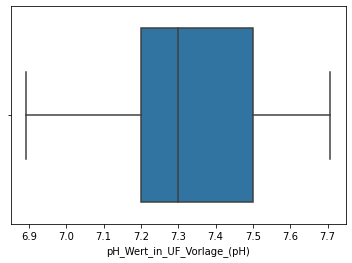

,Gesamt_Zulaufmenge_zu_AKF_(m3;h),Durchschnittlicher_CSB-Zulauf_(mg;l),Verweildauer_Tank_(h),AKF_Tank_CSB_aktuelle_Fracht,AKF_Tank_CSB_Fracht,pH_Wert_in_UF_Vorlage_(pH),Temperatur_in_UF_Vorlage_(°C),AKF_Tank_CSB
0,17.290,442.670677,1.156738,7.653776,17409.263914,7.3,30.200,434.0
1,17.290,434.000000,1.156738,7.503860,12750.853532,7.3,30.200,411.0
2,17.290,411.000000,2.458585,7.106190,7300.736331,7.3,30.200,365.0
3,17.290,365.000000,2.458585,6.310850,2453.274143,7.3,30.200,235.0
4,17.290,235.000000,2.458585,4.063150,199.318775,7.3,30.200,60.0
...,...,...,...,...,...,...,...,...
59316,10.598,486.821193,1.887149,5.159331,12851.106520,7.6,35.642,449.0
59317,10.598,449.000000,1.887149,4.758502,8899.281461,7.6,35.642,415.0
59318,10.598,415.000000,4.100360,4.398170,5968.722526,7.6,35.642,379.0
59319,10.598,379.000000,4.100360,4.016642,3455.272516,7.6,35.642,260.0


In [182]:
iqr_drop(continuous,'pH_Wert_in_UF_Vorlage_(pH)')

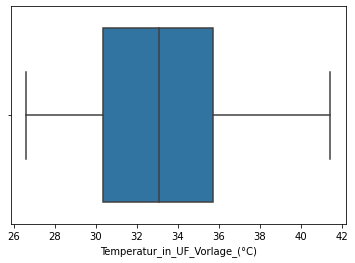

,Gesamt_Zulaufmenge_zu_AKF_(m3;h),Durchschnittlicher_CSB-Zulauf_(mg;l),Verweildauer_Tank_(h),AKF_Tank_CSB_aktuelle_Fracht,AKF_Tank_CSB_Fracht,pH_Wert_in_UF_Vorlage_(pH),Temperatur_in_UF_Vorlage_(°C),AKF_Tank_CSB
0,17.290,442.670677,1.156738,7.653776,17409.263914,7.3,30.200,434.0
1,17.290,434.000000,1.156738,7.503860,12750.853532,7.3,30.200,411.0
2,17.290,411.000000,2.458585,7.106190,7300.736331,7.3,30.200,365.0
3,17.290,365.000000,2.458585,6.310850,2453.274143,7.3,30.200,235.0
4,17.290,235.000000,2.458585,4.063150,199.318775,7.3,30.200,60.0
...,...,...,...,...,...,...,...,...
59316,10.598,486.821193,1.887149,5.159331,12851.106520,7.6,35.642,449.0
59317,10.598,449.000000,1.887149,4.758502,8899.281461,7.6,35.642,415.0
59318,10.598,415.000000,4.100360,4.398170,5968.722526,7.6,35.642,379.0
59319,10.598,379.000000,4.100360,4.016642,3455.272516,7.6,35.642,260.0


In [183]:
iqr_drop(continuous,'Temperatur_in_UF_Vorlage_(°C)')

In [184]:
from scipy.stats import skew

def skew_check(data):  
    
    columns = list(data.columns)
    
    high_skew = []
    
    for c in columns:
        skew = data[c].skew() 
        
        #print(c, ' , ', skew)
        
        if skew > 2:
            
            high_skew.append(c)
    
    print('High skews: ', high_skew)
    
    return high_skew

In [185]:
skew_check(continuous)

High skews:  []


[]

In [186]:
#distplot_df(continuous)

# Correlation Matrix

In [187]:
#function for corr_matrix
def corr_matrix_df(df):
   
    corr_matrix=df.corr(method='pearson')  # default
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True)
    plt.show()

#Calling function
#corr_matrix_df(numericals)

In [188]:
df = pd.concat([categoricals, discrete, continuous], axis = 1, join='inner')

In [189]:
df.reset_index(drop=True, inplace = True)

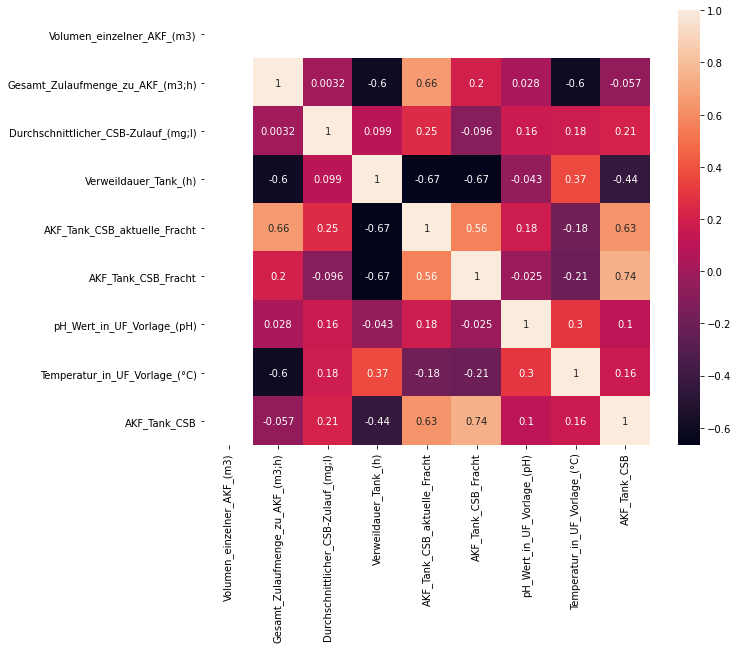

In [190]:
corr_matrix_df(df)

# VIF

In [191]:
import statsmodels.api as sm
import numpy as np

X = df.drop(['DateTime','AKF_Tank_CSB'], axis = 1)
y = df['AKF_Tank_CSB']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params

Volumen_einzelner_AKF_(m3)              23.456978
Gesamt_Zulaufmenge_zu_AKF_(m3;h)       -35.187314
Durchschnittlicher_CSB-Zulauf_(mg;l)     0.050415
Verweildauer_Tank_(h)                   -7.081904
AKF_Tank_CSB_aktuelle_Fracht            78.405927
AKF_Tank_CSB_Fracht                      0.009965
pH_Wert_in_UF_Vorlage_(pH)             -13.769574
Temperatur_in_UF_Vorlage_(°C)           -1.931678
dtype: float64

# X -y Split

In [192]:
X = df.drop(['Volumen_einzelner_AKF_(m3)','AKF_Tank_CSB_aktuelle_Fracht','AKF_Tank_CSB'], axis = 1)
y = df['AKF_Tank_CSB']

In [193]:
X

,DateTime,Gesamt_Zulaufmenge_zu_AKF_(m3;h),Durchschnittlicher_CSB-Zulauf_(mg;l),Verweildauer_Tank_(h),AKF_Tank_CSB_Fracht,pH_Wert_in_UF_Vorlage_(pH),Temperatur_in_UF_Vorlage_(°C)
0,2019-01-05 00:00:00,17.290,442.670677,1.156738,17409.263914,7.3,30.200
1,2019-01-05 00:00:00,17.290,434.000000,1.156738,12750.853532,7.3,30.200
2,2019-01-05 00:00:00,17.290,411.000000,2.458585,7300.736331,7.3,30.200
3,2019-01-05 00:00:00,17.290,365.000000,2.458585,2453.274143,7.3,30.200
4,2019-01-05 00:00:00,17.290,235.000000,2.458585,199.318775,7.3,30.200
...,...,...,...,...,...,...,...
56964,2020-12-11 23:00:00,10.598,486.821193,1.887149,12851.106520,7.6,35.642
56965,2020-12-11 23:00:00,10.598,449.000000,1.887149,8899.281461,7.6,35.642
56966,2020-12-11 23:00:00,10.598,415.000000,4.100360,5968.722526,7.6,35.642
56967,2020-12-11 23:00:00,10.598,379.000000,4.100360,3455.272516,7.6,35.642


In [194]:
X.set_index(X['DateTime'], drop=True, inplace = True)

In [195]:
X.drop(['DateTime'], axis = 1, inplace = True)

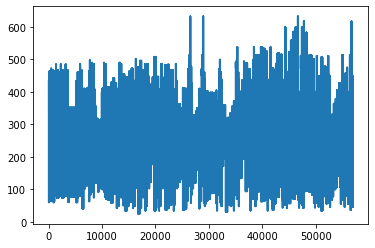

In [196]:
plt.plot(y)

# Train Test Split

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test = pd.DataFrame(X_test, columns = X.columns)

In [198]:
# manual Train Test split 

train_size = 0.9

split = int(len(X)*train_size)

X_train = X.iloc[:split]
y_train = y.iloc[:split]
X_test = X.iloc[split:]
y_test = y.iloc[split:]

# Scaling

In [199]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

transformer = StandardScaler().fit(X)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)


In [200]:
len(X_train_scaled)

51272

In [201]:
len(y_train)

51272

# Model (Polynomial)

In [282]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

model_1 = make_pipeline(PolynomialFeatures(3), Ridge()).fit(X_train_scaled, y_train)
predictions_1 = model_1.predict(X_test_scaled)
predictions_df = pd.DataFrame(predictions_1,columns=[y.name])
MAE = mean_absolute_error(y_test,predictions_1)
MSE = mean_squared_error(y_test,predictions_1)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions_1)
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.3f" % (R2))

The mean absolute error of the model in the test set is:  22.62
The mean squared error of the model in the test set is: 875.76
The root mean squared error of the model in the test set is:  29.59
The R2 of the model in the test set is: 0.947


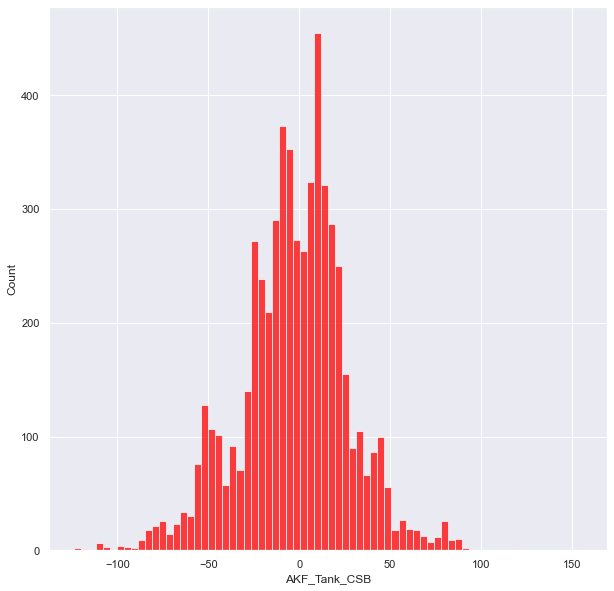

In [283]:
sns.histplot(y_test-predictions_1, color = 'red')
#sns.histplot(y_test, color = 'yellow')
plt.show()

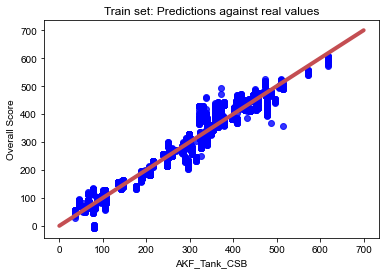

In [204]:
X_plot=np.linspace(0,700,100)
Y_plot=X_plot
fig,ax=plt.subplots()
sns.set(color_codes=True)
sns.set(rc={"figure.figsize":(10,10)})
plt.ylabel("Overall Score")
plt.title("Train set: Predictions against real values")
sns.regplot(x=y_test,y=predictions_1,fit_reg=False, ax=ax, scatter_kws={"color":"blue"})
plt.plot(X_plot,Y_plot,color="r", linewidth = 4)

In [205]:
polynomial_residuals = pd.concat([y_test,y_test-predictions_1],axis=1)
polynomial_residuals.columns = ['real','residual']

print(polynomial_residuals[(polynomial_residuals['residual'] < -20)|(polynomial_residuals['residual'] > 20)])
print('\nTotal:',len(polynomial_residuals[(polynomial_residuals['residual'] < -20)|(polynomial_residuals['residual'] > 20)]))

        real   residual
51310  409.0 -43.569169
51313   78.0  29.614159
51315  409.0 -43.821529
51318   78.0  29.442405
51320  409.0 -43.670110
...      ...        ...
56960  415.0 -23.905685
56963   46.0 -47.523532
56964  449.0 -21.639607
56965  415.0 -23.977534
56968   46.0 -48.261975

[2491 rows x 2 columns]

Total: 2491


# Model (KNN)

In [369]:

model = GridSearchCV(knn, param_grid={
    'n_neighbors': range(1,15),
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':range(1,50,10)},
     cv=5, verbose=2,
n_jobs=-1 )
model.fit(X_train_scaled,y_train)
model.best_params_

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 66.8min


KeyboardInterrupt: 

In [367]:
gsc

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 50, 10),
                         'n_neighbors': range(1, 15),
                         'weights': ['uniform', 'distance']},
             verbose=2)

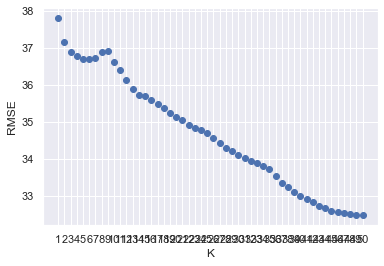

In [206]:
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(1,50+1):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train)  #fit the model
    pred=model.predict(X_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

k_values = list(range(1,50+1))
#k_values_df = pd.DataFrame(k_values)
#rmse_val = pd.DataFrame(rmse_val) #elbow curve 

plt.scatter(x=k_values,y=rmse_val)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.xticks(k_values)
plt.show()

In [207]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled,y_train)
model.best_params_

{'n_neighbors': 9}

In [208]:
# 2 neighbors is to less for usecase

In [209]:
n_neighbors = model.best_params_['n_neighbors']

model_2 = KNeighborsRegressor(n_neighbors, weights='distance').fit(X_train_scaled, y_train)
predictions_2 = model_2.predict(X_test_scaled)

predictions2_df = pd.DataFrame(predictions_2,columns=[y.name])
MAE = mean_absolute_error(y_test,predictions_2)
MSE = mean_squared_error(y_test,predictions_2)
RMSE = np.sqrt(MSE)
MAPE = np.mean(abs(y_test-predictions_2)/y_test)
R2 = r2_score(y_test,predictions_2)
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The MAPE of the model in the test set is: %5.2f" % (MAPE))
print("The R2 of the model in the test set is: %4.3f" % (R2))

The mean absolute error of the model in the test set is:  25.30
The mean squared error of the model in the test set is: 1343.36
The root mean squared error of the model in the test set is:  36.65
The MAPE of the model in the test set is:  0.13
The R2 of the model in the test set is: 0.919


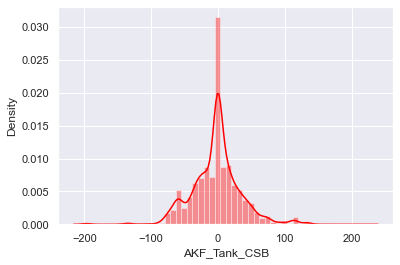

In [210]:
sns.distplot((y_test-predictions_2).round(2), color = 'red')
plt.show()

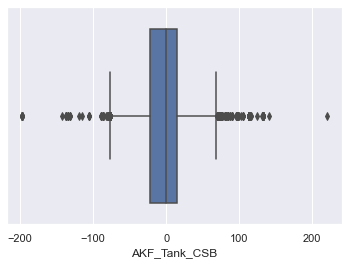

In [211]:
sns.boxplot(y_test-predictions_2)
plt.show()

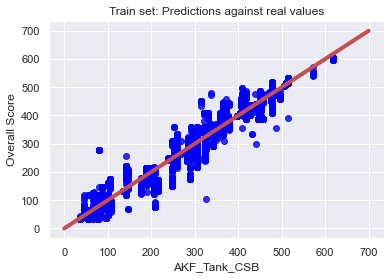

In [212]:
X_plot=np.linspace(0,700,100)
Y_plot=X_plot
fig,ax=plt.subplots()
sns.set(color_codes=True)
sns.set(rc={"figure.figsize":(10,10)})
plt.ylabel("Overall Score")
plt.title("Train set: Predictions against real values")
sns.regplot(x=y_test,y=predictions_2,fit_reg=False, ax=ax, scatter_kws={"color":"blue"})
plt.plot(X_plot,Y_plot,color="r", linewidth = 4)

In [213]:
k_nn_residuals = pd.concat([y_test,y_test-predictions_2],axis=1)
k_nn_residuals.columns = ['real','residual']
k_nn_residuals.head()
k_nn_residuals[k_nn_residuals['residual'] < -100]

,real,residual
52010,338.0,-133.751494
54323,141.0,-114.758684
54709,338.0,-142.147362
54802,253.0,-105.000000
54806,253.0,-105.000000
54810,253.0,-105.000000
54814,253.0,-105.000000
55842,80.0,-196.734142
55847,80.0,-196.800289
55852,80.0,-196.792736


# Model (SVM) 

In [214]:
from sklearn.svm import SVR

model_3 = SVR(C=1.0, epsilon=20).fit(X_train, y_train)
predictions_3 = model_3.predict(X_test)
predictions3_df = pd.DataFrame(predictions_3)

In [215]:
MAE = mean_absolute_error(y_test,predictions_3)
MSE = mean_squared_error(y_test,predictions_3)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions_3)
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.3f" % (R2))

The mean absolute error of the model in the test set is:  45.16
The mean squared error of the model in the test set is: 3220.88
The root mean squared error of the model in the test set is:  56.75
The R2 of the model in the test set is: 0.806


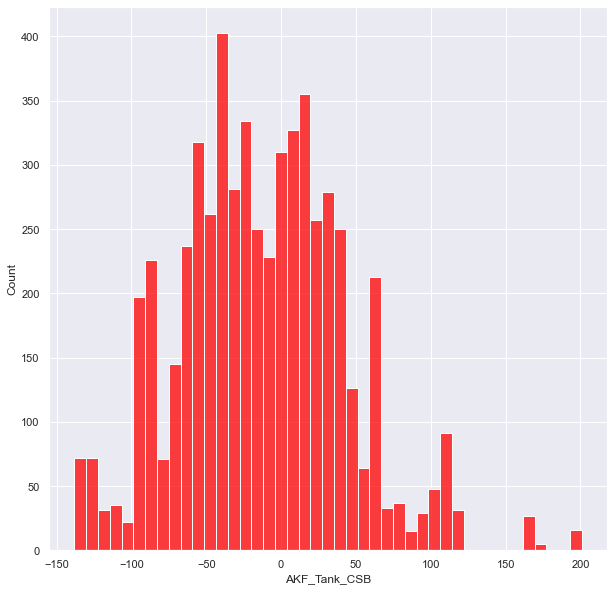

In [216]:
sns.histplot(y_test-predictions_3, color = 'red')
#sns.histplot(y_test, color = 'yellow')
plt.show()

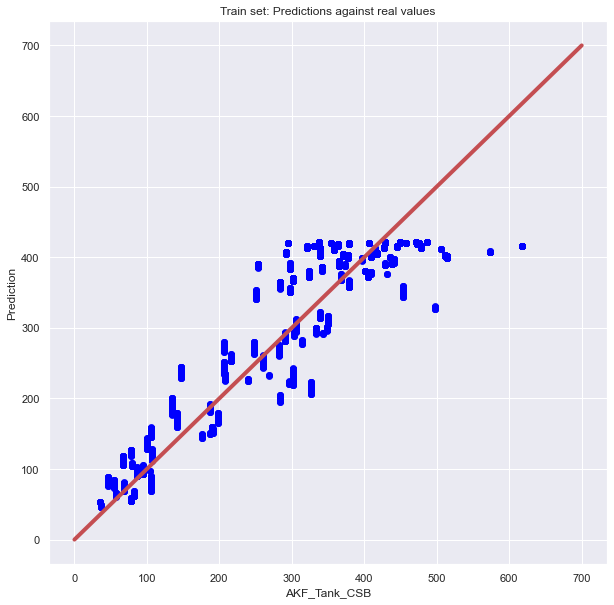

In [217]:
X_plot=np.linspace(0,700,100)
Y_plot=X_plot
fig,ax=plt.subplots()
sns.set(color_codes=True)
sns.set(rc={"figure.figsize":(10,10)})
plt.ylabel("Prediction")
plt.title("Train set: Predictions against real values")
sns.regplot(x=y_test,y=predictions_3,fit_reg=False, ax=ax, scatter_kws={"color":"blue"})
plt.plot(X_plot,Y_plot,color="r", linewidth = 4)

# Model (Random Forest Regressor)

In [222]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [224]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(5,8),
        'n_estimators': (500, 1000, 2000),
    },
     cv=5, scoring='neg_mean_squared_error', verbose=2,
n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_





Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 31.4min finished


In [225]:
best_params

# for 0.5 test_size: 
#{'bootstrap': True,
# 'max_depth': 6,
# 'max_features': 'log2',
# 'n_estimators': 50,
# 'oob_score': False}

{'max_depth': 7, 'n_estimators': 1000}

In [239]:
model_4 = RandomForestRegressor( 
 max_depth = best_params['max_depth'],
 n_estimators = best_params['n_estimators'],
random_state =42, verbose=0).fit(X_train,y_train)
predictions_4 = model_4.predict(X_test)

# Perform K-Fold CV
#scores = cross_val_score(rfr, X_test, y_test, cv=10, scoring='neg_mean_absolute_error')


In [240]:
errors = abs(predictions_4 - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))
model_4.score(X_test, y_test)

Model Performance
Average Error: 24.1090 degrees.
Accuracy = 87.99%.


0.9418822089167046

<AxesSubplot:xlabel='AKF_Tank_CSB', ylabel='Density'>

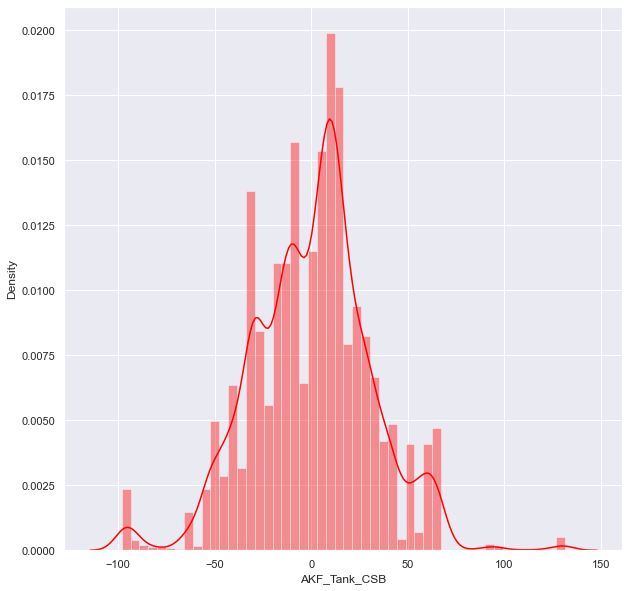

In [241]:
sns.distplot(y_test-predictions_4, color='red')

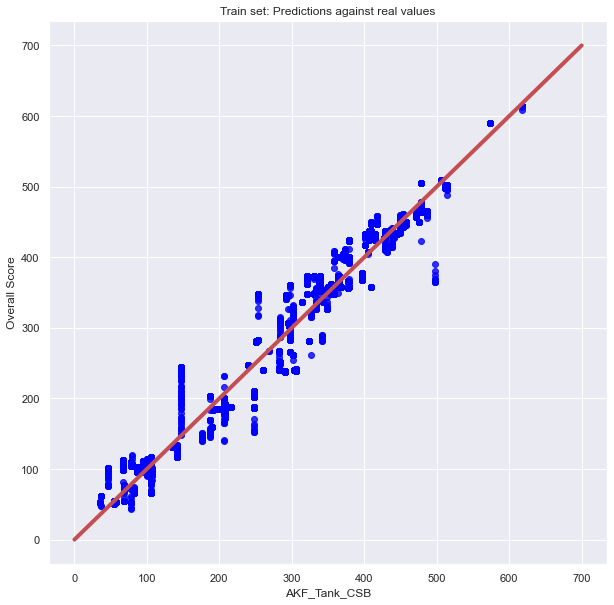

In [242]:
X_plot=np.linspace(0,700,100)
Y_plot=X_plot
fig,ax=plt.subplots()
sns.set(color_codes=True)
sns.set(rc={"figure.figsize":(10,10)})
plt.ylabel("Overall Score")
plt.title("Train set: Predictions against real values")
sns.regplot(x=y_test,y=predictions_4,fit_reg=False, ax=ax, scatter_kws={"color":"blue"})
plt.plot(X_plot,Y_plot,color="r", linewidth = 4)

# Checking the results

In [243]:
check = df.iloc[-48:].drop(['DateTime'], axis = 1)
check

,Volumen_einzelner_AKF_(m3),Gesamt_Zulaufmenge_zu_AKF_(m3;h),Durchschnittlicher_CSB-Zulauf_(mg;l),Verweildauer_Tank_(h),AKF_Tank_CSB_aktuelle_Fracht,AKF_Tank_CSB_Fracht,pH_Wert_in_UF_Vorlage_(pH),Temperatur_in_UF_Vorlage_(°C),AKF_Tank_CSB
56921,20,10.607,415.000000,4.054283,4.401905,5929.351476,7.551,35.300,379.0
56922,20,10.607,379.000000,4.054283,4.020053,3419.316786,7.551,35.300,260.0
56923,20,10.607,260.000000,4.054283,2.757820,688.354656,7.551,35.300,46.0
56924,20,10.176,484.574440,1.965409,4.931030,12809.907366,7.565,35.300,449.0
56925,20,10.176,449.000000,1.965409,4.569024,8861.253855,7.565,35.300,415.0
56926,20,10.176,415.000000,4.238449,4.223040,5933.574516,7.565,35.300,379.0
56927,20,10.176,379.000000,4.238449,3.856704,3423.173490,7.565,35.300,260.0
56928,20,10.176,260.000000,4.238449,2.645760,691.000416,7.565,35.300,46.0
56929,20,10.379,485.327071,1.926968,5.037210,12814.944576,7.575,35.358,449.0
56930,20,10.379,449.000000,1.926968,4.660171,8865.914026,7.575,35.358,415.0


In [244]:
#check['DateTime'] = check['DateTime'].apply(lambda x: pd.Timestamp(x))
#check.set_index(check['DateTime'], drop=True, inplace = True)
#check.drop(['DateTime'], axis = 1, inplace = True)


X_ = X.iloc[-48:]
y_ = y.iloc[-48:]


#transformer = StandardScaler().fit(X_)
X_scaled = transformer.transform(X_)

predictions_1 = model_1.predict(X_scaled)
predictions_2 = model_2.predict(X_scaled)
predictions_3 = model_3.predict(X_scaled)
predictions_4 = model_4.predict(X_)

print('\n=================== MODEL 1 ================')
MAE = mean_absolute_error(y_,predictions_1)
MSE = mean_squared_error(y_,predictions_1)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_,predictions_1)
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.3f" % (R2))

print('\n=================== MODEL 2 ================')
MAE = mean_absolute_error(y_,predictions_2)
MSE = mean_squared_error(y_,predictions_2)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_,predictions_2)
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.3f" % (R2))

print('\n=================== MODEL 3 ================')
MAE = mean_absolute_error(y_,predictions_3)
MSE = mean_squared_error(y_,predictions_3)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_,predictions_3)
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.3f" % (R2))

print('\n=================== MODEL 4 ================')
MAE = mean_absolute_error(y_,predictions_4)
MSE = mean_squared_error(y_,predictions_4)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_,predictions_4)
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.3f" % (R2))

predictions_1_df = pd.DataFrame(predictions_1, columns = ['Polynomial_prediction'])
predictions_2_df = pd.DataFrame(predictions_2, columns = ['KNN'])
predictions_3_df = pd.DataFrame(predictions_3, columns = ['SVM'])
predictions_4_df = pd.DataFrame(predictions_4, columns = ['Hambi'])

pd.concat([y_.reset_index(), predictions_1_df,predictions_2_df,predictions_3_df,predictions_4_df], axis = 1)


=================== MODEL 1 ================
The mean absolute error of the model in the test set is:  19.58
The mean squared error of the model in the test set is: 593.64
The root mean squared error of the model in the test set is:  24.36
The R2 of the model in the test set is: 0.973

=================== MODEL 2 ================
The mean absolute error of the model in the test set is:   1.12
The mean squared error of the model in the test set is:   7.91
The root mean squared error of the model in the test set is:   2.81
The R2 of the model in the test set is: 1.000

=================== MODEL 3 ================
The mean absolute error of the model in the test set is: 264.06
The mean squared error of the model in the test set is: 91405.56
The root mean squared error of the model in the test set is: 302.33
The R2 of the model in the test set is: -3.213

=================== MODEL 4 ================
The mean absolute error of the model in the test set is:  23.08
The mean squared error of 

,index,AKF_Tank_CSB,Polynomial_prediction,KNN,SVM,Hambi
0,56921,379.0,372.154068,378.548061,40.650447,357.435096
1,56922,260.0,265.596943,260.223021,40.616381,240.802181
2,56923,46.0,83.108142,54.810479,40.562956,101.595697
3,56924,449.0,455.784932,449.000000,40.737859,433.934999
4,56925,415.0,428.642645,415.000000,40.688571,423.872228
5,56926,379.0,372.648745,379.000000,40.650574,357.435096
6,56927,260.0,266.539285,260.000000,40.616504,240.802181
7,56928,46.0,86.278482,46.000000,40.563066,101.723922
8,56929,449.0,460.105963,449.000000,40.738044,433.934999
9,56930,415.0,431.456105,415.000000,40.688598,423.872228


In [245]:
predictions = [predictions_1,predictions_2,predictions_3,predictions_4]
models = ['Polynomial', 'KNN', 'Support Vector Machine', 'Random Forest']

for i, prediction in enumerate(predictions):
    residuals = list(y_-prediction)
    min_value = max(residuals)
    max_value = min(residuals)
    to_low = [residual for residual in residuals if residual > 0]
    to_high = [residual for residual in residuals if residual < -20]
    

    print('\n============', models[i], '============')
    print('\nMax residual:',round(min_value,2))
    print('\nMin residual:',round(max_value,2))
    print('\nToo high predictions:', len(to_high))
    print('\n',to_high)
    print('\nToo low predictions:',len(to_low))
    print('\n',to_low)



============ Polynomial ============

Max residual: 6.85

Min residual: -48.26

Too high predictions: 20

 [-37.108141829227264, -40.27848160124563, -41.413941244334524, -43.72144704581686, -20.494625092623778, -44.95310363801167, -21.82282222368059, -46.55310850653953, -20.235659909171545, -22.724862746847805, -46.957279132433655, -21.56170018959847, -23.735889749670207, -47.270004327450124, -21.72415950297261, -23.90568490727327, -47.52353236591324, -21.639606944406978, -23.977534322947463, -48.261975005017604]

Too low predictions: 4

 [6.845932137235536, 6.351255407523695, 4.080537827969238, 1.0744533757352883]

============ KNN ============

Max residual: 1.85

Min residual: -8.81

Too high predictions: 0

 []

Too low predictions: 20

 [0.45193856987305026, 5.684341886080802e-14, 5.684341886080802e-14, 5.684341886080802e-14, 5.684341886080802e-14, 0.7866879701095115, 5.684341886080802e-14, 5.684341886080802e-14, 0.7842038843380053, 5.684341886080802e-14, 5.684341886080802e-14, 5

# Pickle the model

In [286]:
import pickle

# pickle model_4 (RandomForestRegressor) 
filename_rfr = 'randomforestregressor.sav'
pickle.dump(model_4, open(filename_rfr, 'wb'))

# pickle model_3 (Support Vector Machine)
filename_svm = 'suportvectormachine.sav'
pickle.dump(model_3, open(filename_svm, 'wb'))

# pickle model_2 (Support Vector Machine)
filename_knn = 'knnregressor.sav'
pickle.dump(model_2, open(filename_knn, 'wb'))

# pickle model_1 (Support Vector Machine)
#filename_poly = 'polynomialregressor.sav'
#pickle.dump(model_1, open(filename_poly, 'wb'))

# Function for making predictions

In [324]:
def csb_prediction(Gesamt_Zulaufmenge_zu_AKF, Durchschnittlicher_CSB_Zulauf,
                 Volumen_einzelner_AKF_m3, Bypass_m3,
                   AKF_Tank_01_CSB_Fracht,
                   AKF_Tank_02_CSB_Fracht,
                   AKF_Tank_03_CSB_Fracht,
                   AKF_Tank_04_CSB_Fracht,
                   AKF_Tank_05_CSB_Fracht,
                   pH_Wert_in_UF_Vorlage,
                 Temperatur_in_UF_Vorlage):
    
    
    # loading Polynomial Model
    #filename_poly = 'polynomialregressor.sav'
    #poly = pickle.load(open(filename_poly, 'rb'))
    #weight_poly = 0.2     # Weight for the Polynomial Model 
    
    # loading KNN Model
    #filename_knn = 'knnregressor.sav'
    #knn = pickle.load(open(filename_knn, 'rb'))
    #weight_knn = 0.2     # Weight for the KNN Model 
    
    # loading RandomForest Model
    filename_rfr = 'randomforestregressor.sav'
    rfr = pickle.load(open(filename_rfr, 'rb'))
    weight_rfr = 0.7     # Weight for the RandomForest Model comparing SVM model
        
    # Loading SuportVectorMachine Model
    filename_svm = 'suportvectormachine.sav'
    svm = pickle.load(open(filename_svm, 'rb'))
    weight_svm = 0.3
    
    # Making CSB prediction for Tank 1
    values_Tank_1 = pd.Series({'Gesamt_Zulaufmenge_zu_AKF_(m3;h)': Gesamt_Zulaufmenge_zu_AKF,
                  'Durchschnittlicher_CSB-Zulauf_(mg;l)': Durchschnittlicher_CSB_Zulauf,
                    'Verweildauer_Tank_(h)': Volumen_einzelner_AKF_m3 / Gesamt_Zulaufmenge_zu_AKF,
                    'AKF_Tank_01_CSB_Fracht': AKF_Tank_01_CSB_Fracht,
                    'pH_Wert_in_UF_Vorlage_(pH)': pH_Wert_in_UF_Vorlage,
                    'Temperatur_in_UF_Vorlage_(°C)':Temperatur_in_UF_Vorlage})
    
    csb_prediction_Tank_1_rfr = rfr.predict(pd.DataFrame(values_Tank_1).T)
    csb_prediction_Tank_1_svm = svm.predict(pd.DataFrame(values_Tank_1).T)

    
    csb_prediction_Tank_1 = csb_prediction_Tank_1_rfr * weight_rfr + csb_prediction_Tank_1_svm * weight_svm 
    print('\n==== Predictions Filter 1 ====')
    print('CSB prediction for Filter 1 (RFR):',csb_prediction_Tank_1_rfr)
    print('CSB prediction for Filter 1 (SVM):',csb_prediction_Tank_1_svm)

    print('\n>> CSB prediction for Filter 1:', csb_prediction_Tank_1)
    
    # Making CSB prediction for Tank 2   
    values_Tank_2 = pd.Series({'Gesamt_Zulaufmenge_zu_AKF_(m3;h)': Gesamt_Zulaufmenge_zu_AKF,
                  'Durchschnittlicher_CSB-Zulauf_(mg;l)': csb_prediction_Tank_1,
                    'Verweildauer_Tank_(h)': Volumen_einzelner_AKF_m3 / (Gesamt_Zulaufmenge_zu_AKF-Bypass_m3),
                    'AKF_Tank_02_CSB_Fracht': AKF_Tank_02_CSB_Fracht,
                    'pH_Wert_in_UF_Vorlage_(pH)': pH_Wert_in_UF_Vorlage,
                    'Temperatur_in_UF_Vorlage_(°C)':Temperatur_in_UF_Vorlage})
    
    
    csb_prediction_Tank_2_rfr = rfr.predict(pd.DataFrame(values_Tank_2).T)
    csb_prediction_Tank_2_svm = svm.predict(pd.DataFrame(values_Tank_2).T)
    
    csb_prediction_Tank_2 = csb_prediction_Tank_2_rfr * weight_rfr + csb_prediction_Tank_2_svm * weight_svm
    print('\n==== Predictions Filter 2 ====')
    print('CSB prediction for Filter 2 (RFR):',csb_prediction_Tank_2_rfr)
    print('CSB prediction for Filter 2 (SVM):',csb_prediction_Tank_2_svm)
    print('\n>> CSB prediction for Tank 2:', 
          csb_prediction_Tank_2)
    
    # Making CSB prediction for Tank 3
    values_Tank_3 = pd.Series({'Gesamt_Zulaufmenge_zu_AKF_(m3;h)': Gesamt_Zulaufmenge_zu_AKF,
                  'Durchschnittlicher_CSB-Zulauf_(mg;l)': csb_prediction_Tank_2,
                    'Verweildauer_Tank_(h)': Volumen_einzelner_AKF_m3 / (Gesamt_Zulaufmenge_zu_AKF-Bypass_m3),
                    'AKF_Tank_02_CSB_Fracht': AKF_Tank_03_CSB_Fracht,
                    'pH_Wert_in_UF_Vorlage_(pH)': pH_Wert_in_UF_Vorlage,
                    'Temperatur_in_UF_Vorlage_(°C)':Temperatur_in_UF_Vorlage})
    

    csb_prediction_Tank_3_rfr = rfr.predict(pd.DataFrame(values_Tank_3).T)
    csb_prediction_Tank_3_svm = svm.predict(pd.DataFrame(values_Tank_3).T)
    
    csb_prediction_Tank_3 = csb_prediction_Tank_3_rfr * weight_rfr + csb_prediction_Tank_3_svm * weight_svm
    print('\n==== Predictions Filter 3 ====')
    print('CSB prediction for Filter 3 (RFR):',csb_prediction_Tank_3_rfr)
    print('CSB prediction for Filter 3 (SVM):',csb_prediction_Tank_3_svm)
    print('\n>> CSB prediction for Filter 3:', 
          csb_prediction_Tank_3)
    
    # Making CSB prediction for Tank 4
    values_Tank_4 = pd.Series({'Gesamt_Zulaufmenge_zu_AKF_(m3;h)': Gesamt_Zulaufmenge_zu_AKF,
                  'Durchschnittlicher_CSB-Zulauf_(mg;l)': csb_prediction_Tank_3,
                    'Verweildauer_Tank_(h)': Volumen_einzelner_AKF_m3 / (Gesamt_Zulaufmenge_zu_AKF-Bypass_m3),
                    'AKF_Tank_02_CSB_Fracht': AKF_Tank_04_CSB_Fracht,
                    'pH_Wert_in_UF_Vorlage_(pH)': pH_Wert_in_UF_Vorlage,
                    'Temperatur_in_UF_Vorlage_(°C)':Temperatur_in_UF_Vorlage})
    
    csb_prediction_Tank_4_rfr = rfr.predict(pd.DataFrame(values_Tank_4).T)
    csb_prediction_Tank_4_svm = svm.predict(pd.DataFrame(values_Tank_4).T)
    csb_prediction_Tank_4 = csb_prediction_Tank_4_rfr * weight_rfr + csb_prediction_Tank_4_svm * weight_svm
    print('\n==== Predictions Tank 4 ====')
    print('CSB prediction for Tank 4 (RFR):',csb_prediction_Tank_4_rfr)
    print('CSB prediction for Tank 4 (SVM):',csb_prediction_Tank_4_svm)
    print('\n>> CSB prediction for Tank 4:', 
          csb_prediction_Tank_4_rfr * weight_rfr + csb_prediction_Tank_4_svm * weight_svm)
    
    # Making CSB prediction for Tank 5
    values_Tank_5 = pd.Series({'Gesamt_Zulaufmenge_zu_AKF_(m3;h)': Gesamt_Zulaufmenge_zu_AKF,
                  'Durchschnittlicher_CSB-Zulauf_(mg;l)': csb_prediction_Tank_4,
                    'Verweildauer_Tank_(h)': Volumen_einzelner_AKF_m3 / (Gesamt_Zulaufmenge_zu_AKF-Bypass_m3),
                    'AKF_Tank_02_CSB_Fracht': AKF_Tank_05_CSB_Fracht,
                    'pH_Wert_in_UF_Vorlage_(pH)': pH_Wert_in_UF_Vorlage,
                    'Temperatur_in_UF_Vorlage_(°C)':Temperatur_in_UF_Vorlage})
    
    csb_prediction_Tank_5_rfr = rfr.predict(pd.DataFrame(values_Tank_5).T)
    csb_prediction_Tank_5_svm = svm.predict(pd.DataFrame(values_Tank_5).T)
    csb_prediction_Tank_5 = csb_prediction_Tank_5_rfr * weight_rfr + csb_prediction_Tank_5_svm * weight_svm
    print('\n==== Predictions Tank 5 ====')
    print('CSB prediction for Tank 5 (RFR):',csb_prediction_Tank_5_rfr)
    print('CSB prediction for Tank 5 (SVM):',csb_prediction_Tank_5_svm)
    print('\n>> CSB prediction for Tank 5:', 
          csb_prediction_Tank_5_rfr * weight_rfr + csb_prediction_Tank_5_svm * weight_svm)

    return csb_prediction_Tank_1, csb_prediction_Tank_2, csb_prediction_Tank_3, csb_prediction_Tank_4, csb_prediction_Tank_5
    
    
    
    
    


# Making predictions

In [375]:
# Example for 2020-11-13 20:00


csb_prediction_Tank_1, csb_prediction_Tank_2, csb_prediction_Tank_3, csb_prediction_Tank_4, csb_prediction_Tank_5 = csb_prediction(
    Gesamt_Zulaufmenge_zu_AKF = 10.454, 
    Durchschnittlicher_CSB_Zulauf = 487.77,
               Volumen_einzelner_AKF_m3 = 20,  
               Bypass_m3 = 5.77,
                   AKF_Tank_01_CSB_Fracht = 12958.93,
                   AKF_Tank_02_CSB_Fracht = 9000,
                   AKF_Tank_03_CSB_Fracht = 6063.2,
                   AKF_Tank_04_CSB_Fracht = 3536.68,
                   AKF_Tank_05_CSB_Fracht = 775.41,
                   pH_Wert_in_UF_Vorlage = 7.2,
                 Temperatur_in_UF_Vorlage = 36.3)


==== Predictions Filter 1 ====
CSB prediction for Filter 1 (RFR): [448.24195208]
CSB prediction for Filter 1 (SVM): [420.25918455]

>> CSB prediction for Filter 1: [439.84712182]

==== Predictions Filter 2 ====
CSB prediction for Filter 2 (RFR): [400.01111492]
CSB prediction for Filter 2 (SVM): [412.84183321]

>> CSB prediction for Tank 2: [403.86033041]

==== Predictions Filter 3 ====
CSB prediction for Filter 3 (RFR): [354.62609538]
CSB prediction for Filter 3 (SVM): [369.23100287]

>> CSB prediction for Filter 3: [359.00756762]

==== Predictions Tank 4 ====
CSB prediction for Tank 4 (RFR): [240.08255872]
CSB prediction for Tank 4 (SVM): [264.65571021]

>> CSB prediction for Tank 4: [247.45450417]

==== Predictions Tank 5 ====
CSB prediction for Tank 5 (RFR): [97.90021342]
CSB prediction for Tank 5 (SVM): [92.15304167]

>> CSB prediction for Tank 5: [96.1760619]


In [ ]:
# Example for 2020-11-13 20:00


csb_prediction_Tank_1, csb_prediction_Tank_2, csb_prediction_Tank_3, csb_prediction_Tank_4, csb_prediction_Tank_5 = csb_prediction(
    Gesamt_Zulaufmenge_zu_AKF = 10.454, 
    Durchschnittlicher_CSB_Zulauf = 487.77,
               Volumen_einzelner_AKF_m3 = 20,  
               Bypass_m3 = 5.77,
                   AKF_Tank_01_CSB_Fracht = 12958.93,
                   AKF_Tank_02_CSB_Fracht = 9000,
                   AKF_Tank_03_CSB_Fracht = 6063.2,
                   AKF_Tank_04_CSB_Fracht = 3536.68,
                   AKF_Tank_05_CSB_Fracht = 775.41,
                   pH_Wert_in_UF_Vorlage = 7.2,
                 Temperatur_in_UF_Vorlage = 36.3)

In [405]:
data['DateTime'].contains('2020-11-07')

AttributeError: 'Series' object has no attribute 'contains'